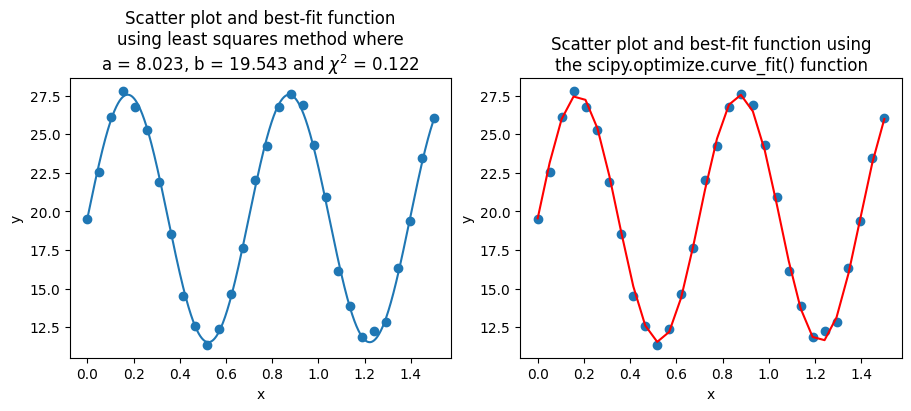

In [ ]:
# Exercise 1

# i = 9, a = 39/5 = 7.8, b = 39/2 = 19.5
# f(x) = 7.8 * sin(9x) + 19.5

# the necessary libraries are imported.
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# variable 'new_line' is set to the string '\n' to add new lines in an f-string.
new_line = '\n'

# 30 evenly sapced x-values are generated between 0 and 1.5 and assigned to variable 'x'.
x = np.linspace(0,1.5,30)

# y-values are generated based on the funcion f(x) plus some random noise.
y = 7.8 * np.sin(9*x) + 19.5
error_bounds = 0.05 * (np.max(y) - np.min(y))
y += np.random.uniform(-error_bounds, error_bounds, 30)

# a figure with two subplots is created.
fig, ax = plt.subplots(1,2, figsize=(9,4), constrained_layout=True)

# for both subplot, a scatter plot of the data with x and y labels is created.
for i in ax:
    i.scatter(x, y)
    i.set_xlabel('x')
    i.set_ylabel('y')

# the data presented in the graph appears to fit a sine function.

# function f() is defined as a sine function with adjustable amplitude and phase.
def f(x,a,b):
    return a * np.sin(9*x) + b

# arrays containing a range of potential values for the parameters a and b are created.
a_domain = np.linspace(0,10,800)
b_domain = np.linspace(0,25,1600)

# the chi-squared values for all possible combinations of a and b is calculated.
# deltaO is the standard deviation of the y values.
chi_squared = np.zeros((len(a_domain),len(b_domain)))
deltaO = np.std(y)
for i, a in enumerate(a_domain):
    for j, b in enumerate(b_domain):
        E = f(x,a,b)
        chi_squared[i,j] = np.sum(((y - E)/(deltaO))**2)

# variable 'min_value' is assigned the minimum value in the chi_squared array.
min_value = np.min(chi_squared)

# the corresponding values of a and b are found and assigned to 'min_a' and 'min_b'.
min_indeces = np.where(chi_squared == min_value)
min_index_a = min_indeces[0][0]
min_index_b = min_indeces[1][0]
min_a = a_domain[min_index_a]
min_b = b_domain[min_index_b]

# a large amount of x values and corresponding y values is generated using the optimized values of a and b.
x_best_fit = np.linspace(0,1.5,10000)
y_best_fit = f(x_best_fit, min_a, min_b)

# the best-fit function using the least squared method is plotted in the first subplot.
ax[0].plot(x_best_fit,y_best_fit)
ax[0].set_title(f"Scatter plot and best-fit function{new_line}using least squares method where{new_line}a = {round(min_a,3)}, b = {round(min_b,3)} and $\chi^2$ = {round(min_value,3)}")

# the curve_fit() function from scipy.optimize us used to find the optimized values of a and b.
popt, pcov = curve_fit(f, x, y)
a_fit = popt[0]
b_fit = popt[1]

# y-values best on the optimized values of a and b found using curve_fit() are generated.
y_curve_fit = a_fit * np.sin(9*x) + b_fit

# the curve_fit() best-fit function is plotted in the second subplot in red.
ax[1].plot(x, y_curve_fit, color='red')
ax[1].set_title(f"Scatter plot and best-fit function using{new_line}the scipy.optimize.curve_fit() function")

# both subplots are presented.
plt.show()


* Description of initial steps: The variable 'x' is generated using np.linspace() function, generating 30 equally spaced points from 0 to 1.5. Variable 'y' is defined as 7.8 * sin(9x) + 19.5, calculating the value of 'y' for each value of 'x'. The size of the random error to be added to the y values was chosen to be 5% of the range of the original function values (meaning it is added randomly both above or below the original function values). This value was chosen because it is a reasonable estimate of the amount of random variation that might be expected in observed data due to measurement error and other sources of noise.

* By taking a large range of x values generated using the np.linspace() function, the plot representing the sine function is condensed (and since x is confined to having only 30 values, the plot appears like a zigzag). By taking a smaller range, the curve of the scatter plot appears to be smoother and easier to interpret.

* The domain of a and b was determined by considering the fact that only a small variation in the a and b values will occur due to the random errors. The 'a' domain being looped over was therefore set from 0 to 10 (since in the original function a = 7.8) and the 'b' domain being looped over was set from 0 to 25 (since in the original function b = 19.5)

* To find the parameters a and b to a precision of at least two decimal points, the amount of points/values in a_domain and b_domain need to be varied to high enough numbers. To find these numbers, the random error added to the y values was initially removed such that the exact values of the parameters are a = 7.8 and b = 19.5. By varying the number of points/values in the variables a_domain and b_domain, it was found that a value of 800 for a_domain and 1600 for b_domain produces a and b values that are accurate to two decimal points (namely a = 7.797246558197747 ≈ 7.8 and b = 19.496560350218886 ≈ 19.5). The error addition was then restored and the number of points/values in the domains capable of calculating the a and b parameters to an accuracy of two decimal points remained.

Angle that provides the biggest distance is 45 degrees


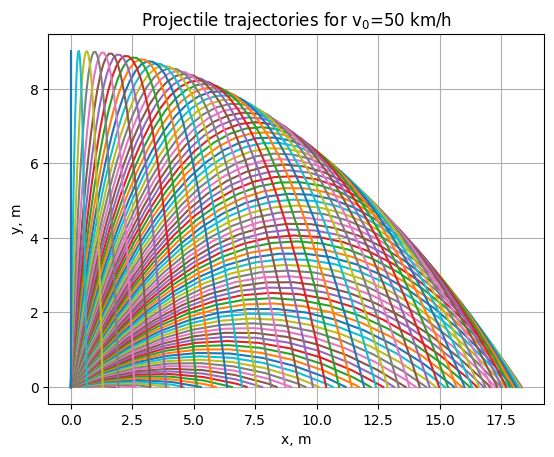

In [ ]:
# Exercise 2

# the necessary libraries are imported.
import matplotlib.pyplot as plt
import numpy as np

# function traj() is defined to calculate the trajectory of the cannonball.
def traj(v_0,thetas):
    '''
    Input:
    v_0 - launch speed in km/h
    thetas - array of launch angles in degrees

    Output:
    plots the trajectories for angles in thetas
    prints the value of the angle with the highest distance travelled horizontally
    '''

    land=[] # Will be used for landing distances
    for j in thetas: # Iterates through angle array
        theta = np.radians(j) # Convert angle to radians
        rho=1.2 # kg/m^3
        csa=10**(-3) # m^2
        c=0.47
        g=9.81 # m/s^2
        m=0.5 # kg

        b=c*rho*csa

        N_steps=1000 # Smoothness

        t=np.linspace(0,100,N_steps)
        dt=100/N_steps

        v_x=np.zeros_like(t)
        v_y=np.zeros_like(t)

        x=np.zeros_like(t)
        y=np.zeros_like(t)

        # Set initial conditions
        x[0]=0
        y[0]=0
        v_0_mps = v_0/3.6 # Convert v_0 to m/s
        v_x[0]=v_0_mps*np.cos(theta)
        v_y[0]=v_0_mps*np.sin(theta)

        for i in range(1,len(t)): # Updates the velocity components with drag and gravity
            v=np.sqrt(v_x[i-1]**2+v_y[i-1]**2) # Calculates the speed
            a=b*v**2/m # Calculates the drag force
            a_x=a*(v_x[i-1]/v) # Calculates the drag components
            a_y=a*(v_y[i-1]/v)
            v_x[i]=v_x[i-1]-a_x*dt # Corrects the velocity components
            v_y[i]=v_y[i-1]-a_y*dt-g*dt # Adds gravitational acceleration
            x[i]=x[i-1]+v_x[i]*dt # Computes x and y coordinates
            y[i]=y[i-1]+v_y[i]*dt

            if y[i] < 0: # Check if projectile has hit the ground
                # Set the x and y coordinates to the point of impact
                x[i] = x[i-1] - y[i-1] * (x[i] - x[i-1]) / (y[i] - y[i-1])
                y[i] = 0
                break


        # Append landing distance to list
        land.append(x[i])

        # Plot trajectory up to point of impact
        plt.plot(x[:i+1],y[:i+1])

    # Find optimal angle
    max_x=max(land)
    opt_ang=np.round(thetas[land.index(max_x)],3)

    # Print result
    print('Angle that provides the biggest distance is '+str(opt_ang)+' degrees')

    # Set plot labels and title
    plt.grid()
    plt.title('Projectile trajectories for v${_0}$='+str(v_0)+' km/h')
    plt.xlabel('x, m')
    plt.ylabel('y, m')
    plt.show()

v_0 = 50 # km/h
thetas = np.arange(0, 91, 1) # array of angles from 0 to 90 degrees with a difference of 1 degree
traj(v_0, thetas)
